In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this DataLab, you will revisit one of the MLP models you developed in the previous DataLab and dive deeper.

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

7


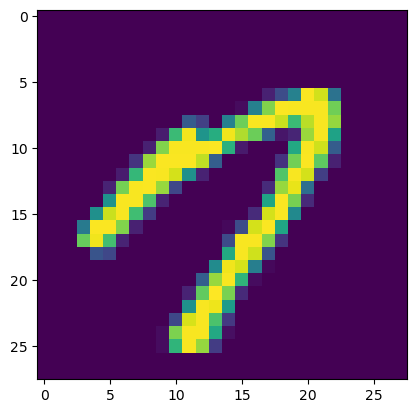

In [3]:
#random image
index = np.random.randint(0, 60000)
plt.imshow(X_train[index])
print(y_train[index])

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## Task 1: Learning curves

**Task 1.1**

Adjust the shapes of X_train, X_test, y_train, y_test to be compatible with the network below.

<img src=https://i.imgur.com/OFNAslJ.png width="500">

In [5]:
X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32') / 255

**Task 1.2**

Build the model. But this time, create a function for this task because you will have to repeat it a few times today.

In [6]:
from keras.models import Sequential
from keras.layers import Dense

def build_model(print_summary=False):
    model = Sequential()
    # YOUR CODE HERE #
    model.add(Dense(30, input_shape=(784,), activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='softmax'))    
    
    # display summary is optional
    if print_summary:
        model.summary()
    return model

model = build_model(print_summary=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


**Task 1.3**

Compile the model. Similarly, create a function for this task. In this DataLab we will use the Adam optimizer.

During compilation, we can define an optimizer as `model.compile(optimizer='adam', ...)`

This is a good starting point, but it does not let us configure the optimizer. Most importantly, when we want to change the learning rate. 

To achieve this, you can do the following:

`from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, ...)`

now this will let you change the learning rate.

Note:

If importing `Adam` gives an error try the following instead:

`from tensorflow.keras.optimizers import Adam`

In [ ]:
from keras.optimizers import Adam
def compile_model(model, lr):
    # YOUR CODE HERE #
    opt=Adam(lr=lr)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = compile_model(model, lr=0.001)

**Task 1.4**

Train the model for 5 epochs. This time save the history `H = model.fit(...)`.

In [ ]:
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

**Task 1.5**

Evaluate the model using `model.evaluate()`.

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

**Task 1.6**

Plot the learning curves for `loss` and `val_loss`. Example output:

<img src=https://i.imgur.com/74WymKX.png width="500">

In [ ]:
def loss_plotter(H):
    plt.plot(H.history['loss'], label='Training Loss')
    plt.plot(H.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

loss_plotter(H)

**Task 1.7**

Plot the learning curves for `accuracy` and `val_accuracy`. Example output:

<img src=https://i.imgur.com/Md9JIHh.png width="500">

In [ ]:
def accuracy_plotter(H):
    plt.plot(H.history['accuracy'], label='Training Accuracy')
    plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
accuracy_plotter(H)

## Task 2: EarlyStopping

In [ ]:
# Use the functions you created in task 1.
model = build_model()
model = compile_model(model, lr=0.001)

**Task 2.1**

Now instead of setting a fixed number of epochs, use `EarlyStopping` callback. Monitor the validation loss with a patience of 2. Remember to restore the best weights.

In [ ]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', patience=2)

**Note:** When using early stopping, you still need to set the number of epochs for training. Let's say you set the epochs to 10, and the model ran for 10 epochs. This means the stopping conditions you set in the callback did not occur therefore the training ran until the end. If the training runs for less than 10 epochs, this means early stopping kicked in.

**Task 2.2**

Train the model with the callback you created in Task 2.1. From now on, always store the history `H = model.fit()`. Set the number of epochs such that you can observe early stopping.

In [ ]:
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, callbacks=[earlystop])

**Task 2.3**

Plot the learning curves. Interpret your results.

- Compare these to the learning curves from Task 1
- Did the model train for more than 5 epochs?
- Did the performance improve?
- Do you think the model is overfitting?

In [ ]:
loss_plotter(H)

In [ ]:
accuracy_plotter(H)

## Task 3: Tuning learning rate

Train your model with 5 different learning rates.

In [ ]:
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

Use the early stopping callback you created in Task 2. When you are training the models, save each history object. Set the number of epochs to a large enough number such that early stopping occurs in some of the learning rates.

**Task 3.1** Plot `val_loss` vs epochs for each learning rate.

Example output:

<img src=https://i.imgur.com/CPqfa3j.png width="500">

closer look:

<img src=https://i.imgur.com/BvSZA0s.png width="500">


These plots show which learning rate(s) are a good choice. But we can plot the best loss vs learning rate to see the relationship even better. 

**Task 3.2** Plot best validation loss vs learning rate.

Example output:

<img src=https://i.imgur.com/xSgQbyZ.png width="500">

Notice that we can use the validation loss obtained at the end of training (last epoch). But that is not necessarily the best. In fact, we are using early stopping for this reason: when the model is not improving, stop with a patience. If you configured the callback correctly, it returns the best model. 
- You can use `model.evaluate()` to calculate the best validation loss.
- Alternatively, since patience is 2, the 3<sup>rd</sup> validation loss from the last must be the best loss in the history.

In [ ]:
histories = [] # for plotting val_loss vs epochs for each learning rate
best_val_losses = [] # for plotting best_val_loss vs learning rate

for lr in learning_rates:
    print('Training with: ', lr)
    model = build_model()
    model = compile_model(model, lr=lr)
    # YOUR CODE HERE #
    earlystop = EarlyStopping(monitor='val_loss', patience=2)
    
    # Train the model with early stopping #
    H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, callbacks=[earlystop])
    
    best_loss = model.evaluate(X_test, y_test)
    
    best_val_losses.append(best_loss)
    histories.append(H)

In [ ]:
# TASK 3.1 #
# Plot validation loss vs. epochs for each learning rate #
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['val_loss'], label='lr:'+str(lr))
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [ ]:
# TASK 3.2 #
# Plot best validation loss vs learning rate # 

plt.plot(range(len(learning_rates)), best_val_losses, 'o-')
plt.xticks(range(len(learning_rates)), learning_rates)
plt.title('Best Validation Loss vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Best Validation Loss')
plt.show()

## Task 4: Creative Brief

Apply what you have learned to your creative brief.

- Plot learning curves
- Use early stopping
- Train your model with different learning rates

See creative brief 